# Twitter Sentiment Analysis

## Importing Necessary Libraries

In [53]:
import pandas as pd
import numpy as np

from twython import Twython

In [54]:
CONSUMER_KEY = "2c4Efn7ZQAzgpfAAlhCSlfhWj"
CONSUMER_SECRET = "Nq53ZGhscd0bQ7TTS1s5OsaE1r2CPegJaNZgUqBevcK79gB72B"

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

In [55]:
twitter

<Twython: 2c4Efn7ZQAzgpfAAlhCSlfhWj>

In [56]:
# ABD'nin tam ortasından (konum olarak) 1000 tane forest fire ile ilgili tweet çek 1000 km çap (621 mil)
results = twitter.search(q = "forest fire", count = 100, language = "en", geocode = "40.015195700673154,-101.75077353442384,621mi")


In [57]:
all = results["statuses"]

In [58]:
for tweet in all:
    print(tweet["text"])
    print("______________")

Idly wondering about how forest fire smoke/haze might effect hospitalization rates during a respiratory disease pandemic.
______________
The Struma Valley. Wild fires rage in the woods above Sandanski town. Two fire-fighters have died in the last 24 hr… https://t.co/P2nq5eW6j4
______________
An exclusive story by @alicanuludag revealed the fire in Manavgat (Antalya) was ignited by a 12-year-old boy who le… https://t.co/uHuaEASGAj
______________
“I think we definitely have a few hard days ahead of us,” said Shannon Prather with the U.S. Forest Service. https://t.co/GRToYH2D1F
______________
“I think we definitely have a few hard days ahead of us,” said Shannon Prather with the U.S. Forest Service. https://t.co/L2FQRgQLoi
______________
Fire Fighters Memorial Garden. Idle Wild Forest Camp, Oregon. Memorials to the 14 wildland firefighters killed at S… https://t.co/ziLOBEkWU9
______________
"I think we definitely have a few hard days ahead of us," said Shannon Prather with the U.S. Forest

In [59]:
tweet_df = pd.DataFrame(all)

In [60]:
tweet_df.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,Wed Aug 04 16:21:35 +0000 2021,1422955885677072384,1422955885677072384,Idly wondering about how forest fire smoke/haz...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,False,0,1,False,False,en,NaN,NaN,NaN,NaN
1,Wed Aug 04 16:08:48 +0000 2021,1422952671389134850,1422952671389134850,The Struma Valley. Wild fires rage in the wood...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,False,3,12,False,False,en,NaN,NaN,NaN,NaN
2,Wed Aug 04 15:52:36 +0000 2021,1422948594886316036,1422948594886316036,An exclusive story by @alicanuludag revealed t...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,False,3,3,False,False,en,False,NaN,NaN,NaN
3,Wed Aug 04 15:30:00 +0000 2021,1422942908173389831,1422942908173389831,“I think we definitely have a few hard days ah...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.socialnewsdesk.com"" rel=""n...",NaN,None,...,False,0,0,False,False,en,False,NaN,NaN,NaN
4,Wed Aug 04 15:30:00 +0000 2021,1422942908152492035,1422942908152492035,“I think we definitely have a few hard days ah...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.socialnewsdesk.com"" rel=""n...",NaN,None,...,False,0,0,False,False,en,False,NaN,NaN,NaN


In [61]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 100 non-null    object 
 1   id                         100 non-null    int64  
 2   id_str                     100 non-null    object 
 3   text                       100 non-null    object 
 4   truncated                  100 non-null    bool   
 5   entities                   100 non-null    object 
 6   metadata                   100 non-null    object 
 7   source                     100 non-null    object 
 8   in_reply_to_status_id      20 non-null     float64
 9   in_reply_to_status_id_str  20 non-null     object 
 10  in_reply_to_user_id        20 non-null     float64
 11  in_reply_to_user_id_str    20 non-null     object 
 12  in_reply_to_screen_name    20 non-null     object 
 13  user                       100 non-null    object 


In [62]:
tweet_user = pd.DataFrame(d["user"] for d in results["statuses"])

In [63]:
tweet_user.head()

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,300637410,300637410,AntJewski,antjewski,"Colorado Springs, CO",Just a city boy... born and raised in SOUTH DE...,None,{'description': {'urls': []}},False,98,...,333333,True,True,False,False,None,None,None,none,[]
1,198460819,198460819,Kapka Kassabova,Kapka_Kassabova,Scotland,Writer of geographies inner and outer. Scotlan...,https://t.co/0iLxY4ylaq,{'url': {'urls': [{'url': 'https://t.co/0iLxY4...,False,4518,...,333333,True,False,False,False,None,None,None,none,[]
2,525561966,525561966,Güldenay Sonumut,Guldenay007,Earth,News Producer @SkyNews / Opinions are my own /...,None,{'description': {'urls': []}},False,5069,...,362720,True,False,False,False,None,None,None,none,[]
3,227046073,227046073,KMOT-TV,KMOT_TV,"Minot, ND","Your News, Weather and Sports Leader in wester...",https://t.co/4t92yktlC3,{'url': {'urls': [{'url': 'https://t.co/4t92yk...,False,3823,...,333333,True,False,False,False,None,None,None,none,[]
4,18079519,18079519,KFYR-TV,KFYRTV,"Bismarck, North Dakota","Your News, Weather and Sports Leader in wester...",http://t.co/W0R6VsdiNq,{'url': {'urls': [{'url': 'http://t.co/W0R6Vsd...,False,11167,...,333333,True,False,False,False,None,None,None,none,[]


In [64]:
tweet_user.shape

(100, 43)

In [65]:
df = tweet_df.merge(tweet_user, left_index = True, right_index = True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 71 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   created_at_x                        100 non-null    object 
 1   id_x                                100 non-null    int64  
 2   id_str_x                            100 non-null    object 
 3   text                                100 non-null    object 
 4   truncated                           100 non-null    bool   
 5   entities_x                          100 non-null    object 
 6   metadata                            100 non-null    object 
 7   source                              100 non-null    object 
 8   in_reply_to_status_id               20 non-null     float64
 9   in_reply_to_status_id_str           20 non-null     object 
 10  in_reply_to_user_id                 20 non-null     float64
 11  in_reply_to_user_id_str             20 non-nul

In [67]:
df.sample(10)

,created_at_x,id_x,id_str_x,text,truncated,entities_x,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
71,Tue Aug 03 04:35:56 +0000 2021,1422415919159054338,1422415919159054338,@KevinSixx13 I don't know how productive it is...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.422385e+18,1422384901794406400,...,333333,True,True,True,False,None,None,None,none,[]
61,Tue Aug 03 06:05:13 +0000 2021,1422438387592482821,1422438387592482821,Green forest fire alert in Canada https://t.co...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,None,...,666666,True,True,False,False,None,None,None,none,[]
32,Tue Aug 03 22:40:58 +0000 2021,1422688976750604288,1422688976750604288,@AlmostMedia *cries in forest fire smoke*,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.422689e+18,1422688920773423113,...,000000,False,False,False,False,None,None,None,none,[]
74,Tue Aug 03 03:37:50 +0000 2021,1422401296448036864,1422401296448036864,She was stroking that peen like she was trying...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
13,Wed Aug 04 10:58:54 +0000 2021,1422874681363816452,1422874681363816452,Greek firefighters battle ‘raging’ forest fire...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://publicize.wp.com/"" rel=""nofoll...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
18,Wed Aug 04 06:12:04 +0000 2021,1422802495944888320,1422802495944888320,Green forest fire alert in Russian Federation ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,None,...,666666,True,True,False,False,None,None,None,none,[]
40,Tue Aug 03 17:49:56 +0000 2021,1422615735625347073,1422615735625347073,Dr. Hotez is a great medical communicator but ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,000000,False,False,False,False,None,None,None,none,[]
48,Tue Aug 03 09:34:33 +0000 2021,1422491066134052866,1422491066134052866,We are in need of fire planes and assistance t...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
96,Mon Aug 02 18:29:59 +0000 2021,1422263425305092098,1422263425305092098,Seidor and NetOP Technology can help fight for...,True,"{'hashtags': [{'text': 'IoT', 'indices': [72, ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.hubspot.com/"" rel=""nofollo...",NaN,None,...,000000,False,False,False,False,None,None,None,none,[]
43,Tue Aug 03 15:45:00 +0000 2021,1422584292086108160,1422584292086108160,The U.S. Forest Service today made the Ice Fir...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,None,...,333333,True,False,True,False,None,None,None,none,[]


<AxesSubplot:>

C:\Users\yskaraman\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yskaraman\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yskaraman\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yskaraman\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yskaraman\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127470 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yskaraman\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarnin

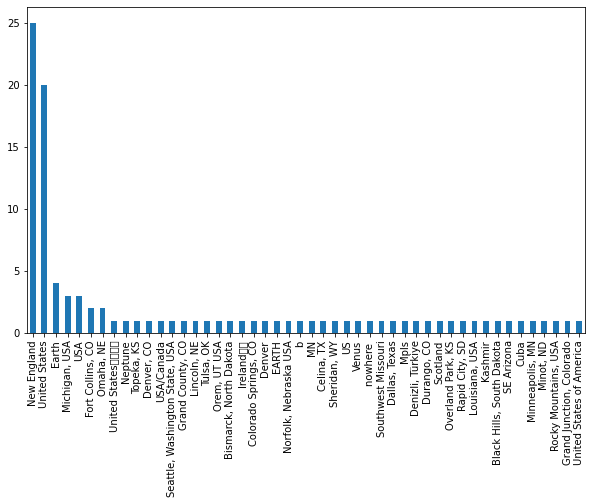

In [68]:
df.location.value_counts().plot(kind = "bar", figsize = (10,6))

# NLP Preprocessing

In [69]:
df = df["text"]
# Since it is a Series, we converted it to a dataframe
df = pd.DataFrame(df)

In [70]:
df

,text
0,Idly wondering about how forest fire smoke/haz...
1,The Struma Valley. Wild fires rage in the wood...
2,An exclusive story by @alicanuludag revealed t...
3,“I think we definitely have a few hard days ah...
4,“I think we definitely have a few hard days ah...
...,...
95,"This past Sat. (July 31st), Bearlodge entered ..."
96,Seidor and NetOP Technology can help fight for...
97,There does appear to be a connection with clim...
98,We are in need of fire planes and assistance t...


In [71]:
# We removed the HTML characters (note this is replace. not str.replace)
df["text"].replace({'r"\&\#[0-9]+\;"':""}, regex = True, inplace = True)

In [72]:
# We converted all text to lowercase
df["text"] = df["text"].str.lower()

In [73]:
# We removed the punctuation marks
df["text"].replace({"[^\w\s]":""}, regex = True, inplace = True)

In [74]:
# We removed the numbers
df["text"].replace({"\d+":""}, regex = True, inplace = True)

In [76]:
# Line break marks are removed
df["text"].replace({"\n":"","\r":"", "\'":""}, regex = True, inplace = True)

In [77]:
# We removed unnecessary whitespace
df["text"].replace({'r"[\s]+"':""}, regex = True, inplace = True)

In [78]:
from unicodedata import normalize
# We've eliminated accents
df["text"] = df["text"].apply(lambda text: normalize("NFKD", str(text)).encode("ascii", "ignore").decode("utf-8", "ignore"))

In [79]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
df["text"] = df["text"].apply(lambda x: " ".join([i for i in str(x).split(" ") if i not in stop_words]))
# here we do this: first we make a list by separating the space with split and we go through every word in it, 
# then we don't take the stop_words ones, we take the others, then we restore them with " ".join

# Language Detecting

In [80]:
from langdetect import detect
df["language"] = df["text"].apply(detect)
df = df[df["language"] == "en"]
df

,text,language
0,idly wondering forest fire smokehaze might eff...,en
1,struma valley wild fires rage woods sandanski ...,en
2,exclusive story alicanuludag revealed fire man...,en
3,think definitely hard days ahead us said shann...,en
4,think definitely hard days ahead us said shann...,en
...,...,...
95,past sat july st bearlodge entered float crook...,en
96,seidor netop technology help fight forest fire...,en
97,appear connection climate change forest fires ...,en
98,need fire planes assistance put stop forest fi...,en


# Polarity - Subjectivity

In [81]:
from textblob import TextBlob
df[["polarity", "subjectivity"]] = df["text"].apply(lambda t: pd.Series(TextBlob(t).sentiment))

# if we said sentiment.polarity it would only give polarity

C:\Users\yskaraman\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [82]:
df

,text,language,polarity,subjectivity
0,idly wondering forest fire smokehaze might eff...,en,0.000000,0.000000
1,struma valley wild fires rage woods sandanski ...,en,0.050000,0.233333
2,exclusive story alicanuludag revealed fire man...,en,0.000000,0.000000
3,think definitely hard days ahead us said shann...,en,-0.291667,0.541667
4,think definitely hard days ahead us said shann...,en,-0.291667,0.541667
...,...,...,...,...
95,past sat july st bearlodge entered float crook...,en,0.175000,0.595833
96,seidor netop technology help fight forest fire...,en,0.214286,0.642857
97,appear connection climate change forest fires ...,en,0.000000,0.000000
98,need fire planes assistance put stop forest fi...,en,0.000000,0.000000


# Tokenization

In [83]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
df["tokenized"] = [tokenizer.tokenize(i) for i in df["text"].values]

<ipython-input-83-2b9c93254c72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tokenized"] = [tokenizer.tokenize(i) for i in df["text"].values]


In [84]:
df

,text,language,polarity,subjectivity,tokenized
0,idly wondering forest fire smokehaze might eff...,en,0.000000,0.000000,"[idly, wondering, forest, fire, smokehaze, mig..."
1,struma valley wild fires rage woods sandanski ...,en,0.050000,0.233333,"[struma, valley, wild, fires, rage, woods, san..."
2,exclusive story alicanuludag revealed fire man...,en,0.000000,0.000000,"[exclusive, story, alicanuludag, revealed, fir..."
3,think definitely hard days ahead us said shann...,en,-0.291667,0.541667,"[think, definitely, hard, days, ahead, us, sai..."
4,think definitely hard days ahead us said shann...,en,-0.291667,0.541667,"[think, definitely, hard, days, ahead, us, sai..."
...,...,...,...,...,...
95,past sat july st bearlodge entered float crook...,en,0.175000,0.595833,"[past, sat, july, st, bearlodge, entered, floa..."
96,seidor netop technology help fight forest fire...,en,0.214286,0.642857,"[seidor, netop, technology, help, fight, fores..."
97,appear connection climate change forest fires ...,en,0.000000,0.000000,"[appear, connection, climate, change, forest, ..."
98,need fire planes assistance put stop forest fi...,en,0.000000,0.000000,"[need, fire, planes, assistance, put, stop, fo..."


# Lemmatization

In [85]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df["lemmatized"] = [[lemmatizer.lemmatize(str(i)) for i in words] for words in df["text"].values]

<ipython-input-85-9c5927061b32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lemmatized"] = [[lemmatizer.lemmatize(str(i)) for i in words] for words in df["text"].values]


In [98]:
df.head()

,text,language,polarity,subjectivity,tokenized,lemmatized,sentiment
0,idly wondering forest fire smokehaze might eff...,en,0.000000,0.000000,"[idly, wondering, forest, fire, smokehaze, mig...","[i, d, l, y, , w, o, n, d, e, r, i, n, g, , ...",1.0
1,struma valley wild fires rage woods sandanski ...,en,0.050000,0.233333,"[struma, valley, wild, fires, rage, woods, san...","[s, t, r, u, m, a, , v, a, l, l, e, y, , w, ...",1.0
2,exclusive story alicanuludag revealed fire man...,en,0.000000,0.000000,"[exclusive, story, alicanuludag, revealed, fir...","[e, x, c, l, u, s, i, v, e, , s, t, o, r, y, ...",1.0
3,think definitely hard days ahead us said shann...,en,-0.291667,0.541667,"[think, definitely, hard, days, ahead, us, sai...","[t, h, i, n, k, , d, e, f, i, n, i, t, e, l, ...",1.0
4,think definitely hard days ahead us said shann...,en,-0.291667,0.541667,"[think, definitely, hard, days, ahead, us, sai...","[t, h, i, n, k, , d, e, f, i, n, i, t, e, l, ...",1.0


In [86]:
df.loc[((df["polarity"] <= 1.0) & (df["polarity"] >= 0.4)), "sentiment"] = 2 # positive
df.loc[((df["polarity"] < 0.4) & (df["polarity"] >= -0.4)), "sentiment"] = 1 # neutral
df.loc[(df["polarity"] < -0.4) & (df["polarity"] >= -1.0), "sentiment"] = 0 # negative

C:\Users\yskaraman\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\yskaraman\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\yskaraman\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [87]:
df

,text,language,polarity,subjectivity,tokenized,lemmatized,sentiment
0,idly wondering forest fire smokehaze might eff...,en,0.000000,0.000000,"[idly, wondering, forest, fire, smokehaze, mig...","[i, d, l, y, , w, o, n, d, e, r, i, n, g, , ...",1.0
1,struma valley wild fires rage woods sandanski ...,en,0.050000,0.233333,"[struma, valley, wild, fires, rage, woods, san...","[s, t, r, u, m, a, , v, a, l, l, e, y, , w, ...",1.0
2,exclusive story alicanuludag revealed fire man...,en,0.000000,0.000000,"[exclusive, story, alicanuludag, revealed, fir...","[e, x, c, l, u, s, i, v, e, , s, t, o, r, y, ...",1.0
3,think definitely hard days ahead us said shann...,en,-0.291667,0.541667,"[think, definitely, hard, days, ahead, us, sai...","[t, h, i, n, k, , d, e, f, i, n, i, t, e, l, ...",1.0
4,think definitely hard days ahead us said shann...,en,-0.291667,0.541667,"[think, definitely, hard, days, ahead, us, sai...","[t, h, i, n, k, , d, e, f, i, n, i, t, e, l, ...",1.0
...,...,...,...,...,...,...,...
95,past sat july st bearlodge entered float crook...,en,0.175000,0.595833,"[past, sat, july, st, bearlodge, entered, floa...","[p, a, s, t, , s, a, t, , j, u, l, y, , s, ...",1.0
96,seidor netop technology help fight forest fire...,en,0.214286,0.642857,"[seidor, netop, technology, help, fight, fores...","[s, e, i, d, o, r, , n, e, t, o, p, , t, e, ...",1.0
97,appear connection climate change forest fires ...,en,0.000000,0.000000,"[appear, connection, climate, change, forest, ...","[a, p, p, e, a, r, , c, o, n, n, e, c, t, i, ...",1.0
98,need fire planes assistance put stop forest fi...,en,0.000000,0.000000,"[need, fire, planes, assistance, put, stop, fo...","[n, e, e, d, , f, i, r, e, , p, l, a, n, e, ...",1.0


# Word Cloud

In [90]:
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = "white", mask = mask, max_words = 25000, stopwords = stopwords)
    wc.generate(str(text))
    wc.to_file("wordcloud.png")
    print("Word Cloud saved successfully")
    path = "wordcloud.png"
    display(Image.open(path))

Word Cloud saved successfully


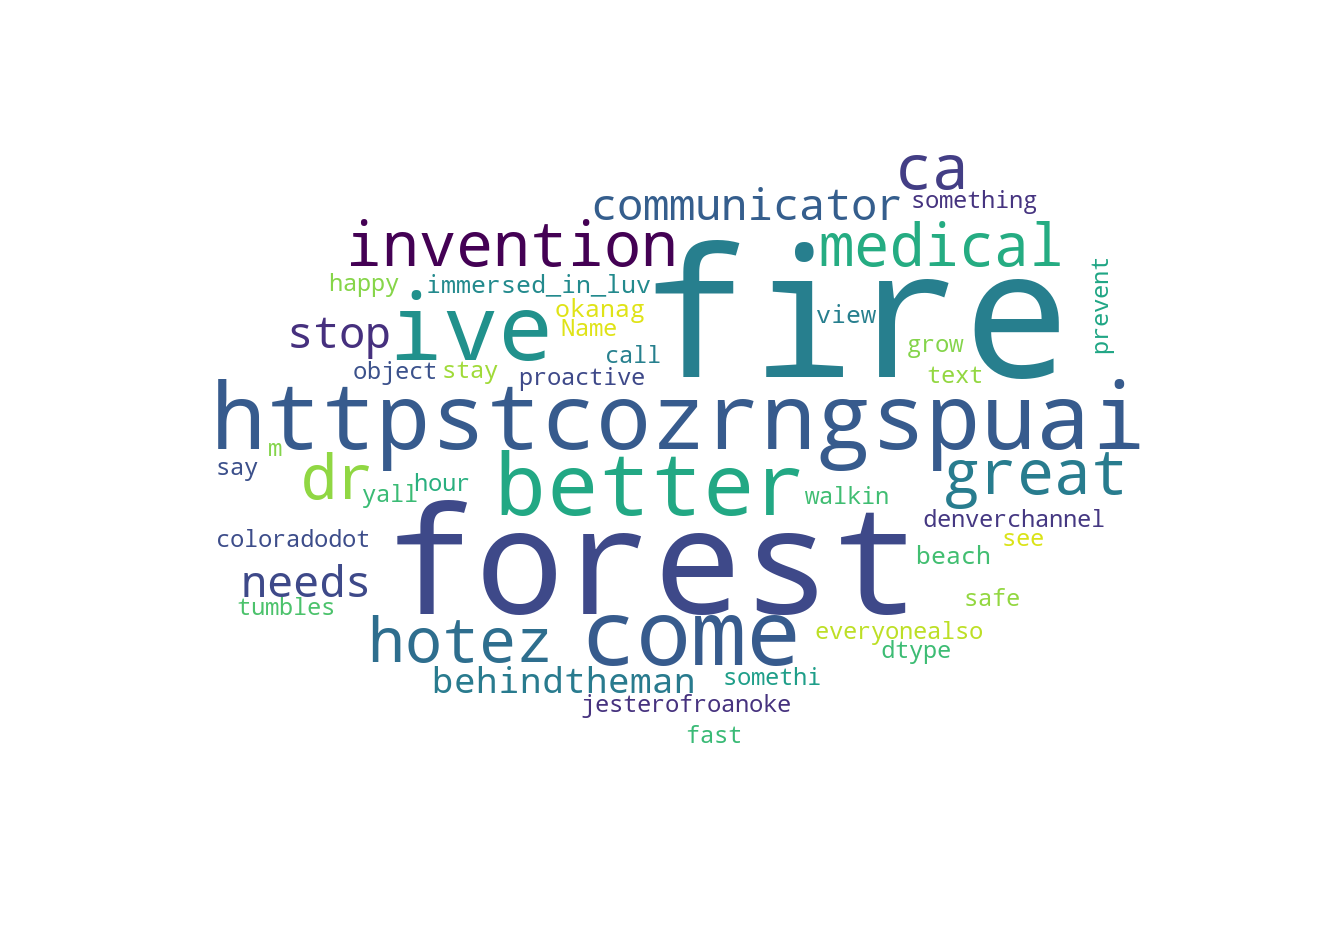

In [91]:
create_wordcloud(df[df["sentiment"] == 2].text) # positive

Word Cloud saved successfully


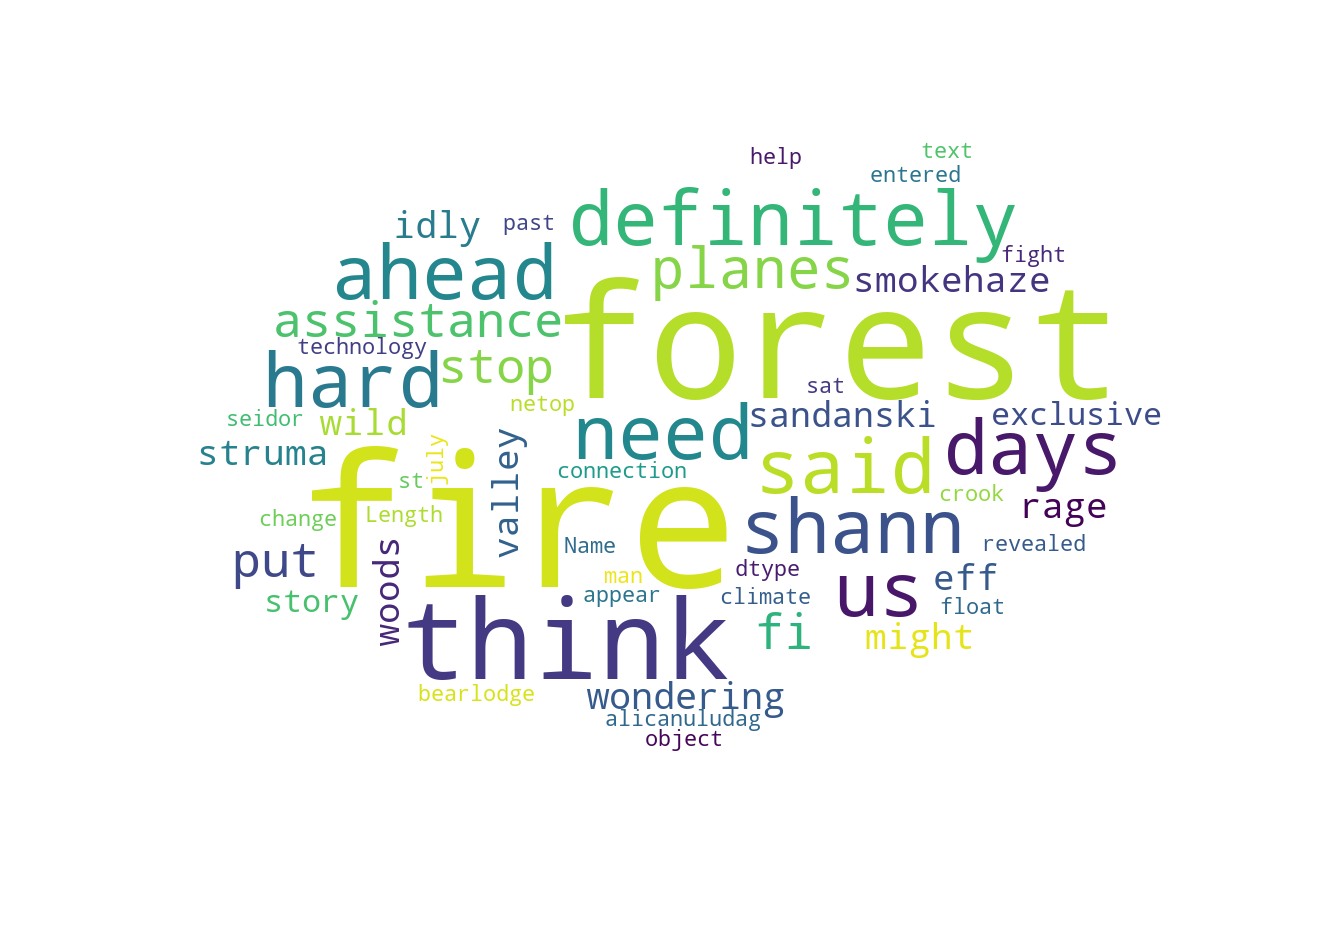

In [92]:
create_wordcloud(df[df["sentiment"] == 1].text) # neutral

Word Cloud saved successfully


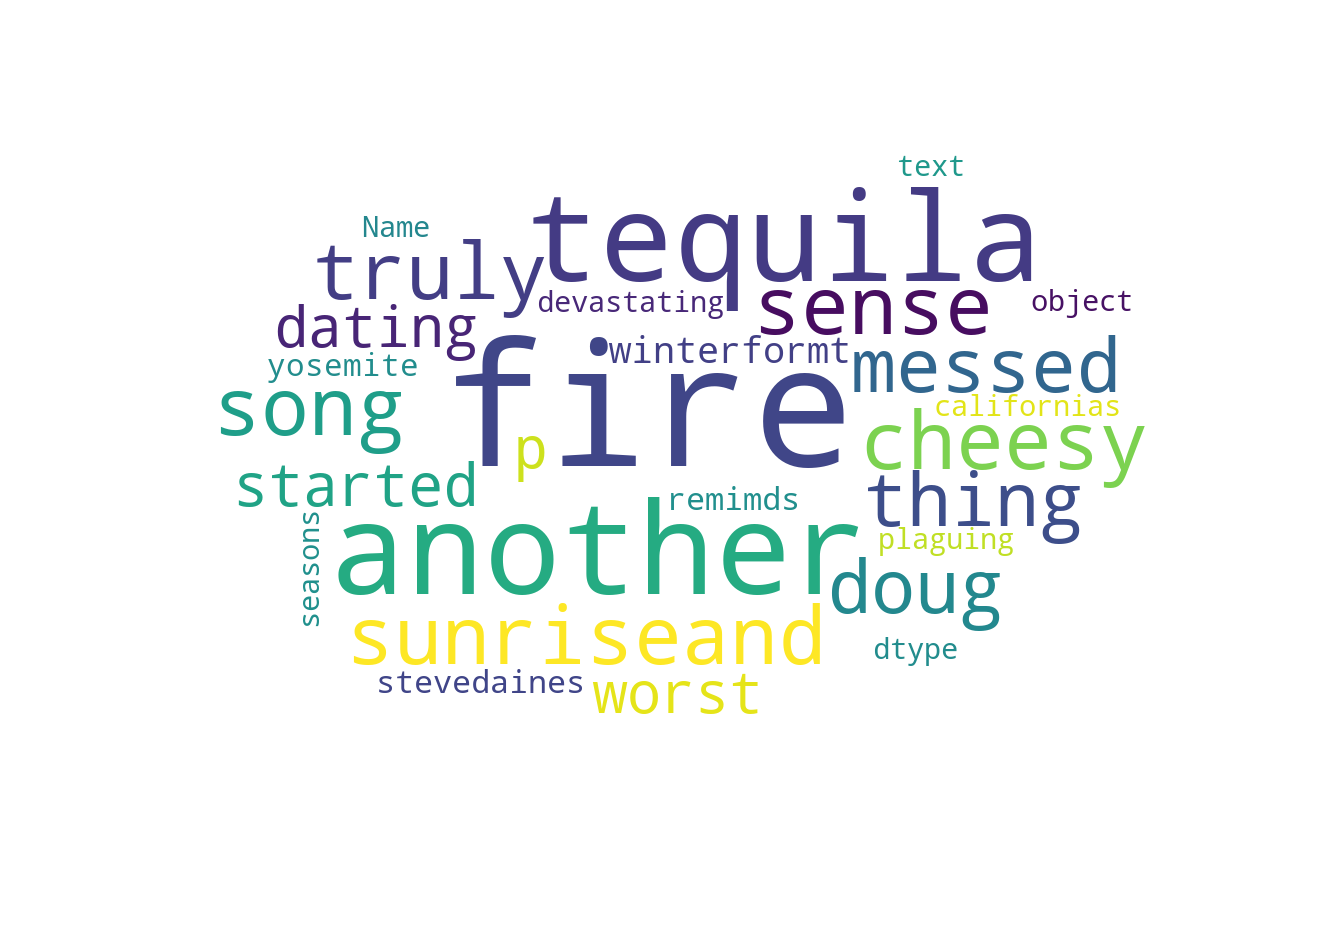

In [93]:
create_wordcloud(df[df["sentiment"] == 0].text)

In [94]:
 df1 = df[["sentiment", "text"]]

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentiment  95 non-null     float64
 1   text       95 non-null     object 
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [96]:
from pycaret.classification import *
exp_name = setup(data = df1, target = "sentiment")

,Description,Value
0,session_id,6738
1,Target,sentiment
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(95, 2)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [97]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8476,0.0000,1.0000,0.8476,0.9175,0.0000,0.0000,0.7780
knn,K Neighbors Classifier,0.8476,0.0000,1.0000,0.8476,0.9175,0.0000,0.0000,0.3390
dt,Decision Tree Classifier,0.8476,0.0000,1.0000,0.8476,0.9175,0.0000,0.0000,0.6830
svm,SVM - Linear Kernel,0.8476,0.0000,1.0000,0.8476,0.9175,0.0000,0.0000,0.3440
ridge,Ridge Classifier,0.8476,0.0000,1.0000,0.8476,0.9175,0.0000,0.0000,0.0070
rf,Random Forest Classifier,0.8476,0.0000,1.0000,0.8476,0.9175,0.0000,0.0000,0.0650
ada,Ada Boost Classifier,0.8476,0.0000,1.0000,0.8476,0.9175,0.0000,0.0000,0.0280
gbc,Gradient Boosting Classifier,0.8476,0.0000,1.0000,0.8476,0.9175,0.0000,0.0000,0.0490
lda,Linear Discriminant Analysis,0.8476,0.0000,1.0000,0.8476,0.9175,0.0000,0.0000,0.0070
et,Extra Trees Classifier,0.8476,0.0000,1.0000,0.8476,0.9175,0.0000,0.0000,0.0580
